In [1]:
import scipy.optimize as opt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Amplitude (A)

In [71]:
def func(x, A):
    return A*np.cos(x)

1.877063052190356


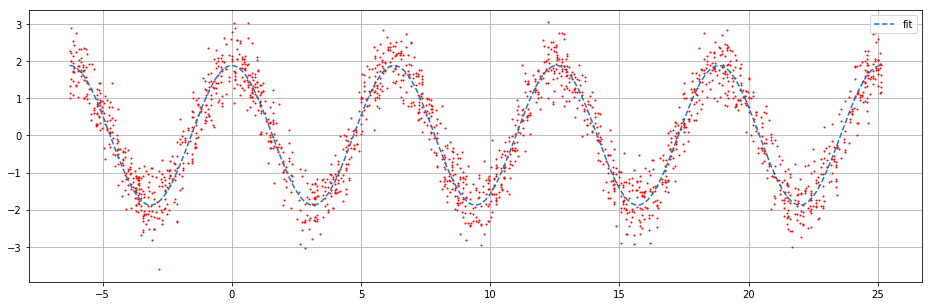

In [72]:
x = np.linspace(-2*np.pi, 8*np.pi, 500)
y = func(x, 1.8534)

sample = np.random.randint(len(x), size=2000)
xs = x[sample]
ys = y[sample]
ys += np.random.normal(0, 0.5, len(ys))


T = np.sum([y*np.cos(x) for (x,y) in zip(xs,ys)])
N = np.sum([np.cos(x)**2 for (x,y) in zip(xs,ys)])
A = T/N
print (A)
yfit = func(x, A)

plt.figure(figsize=(16,5))
#plt.plot(x, y, ':', label='org')
plt.plot(xs, ys, 'r.', ms=2)
plt.plot(x, yfit, '--', label='fit')

plt.grid();
plt.legend();

In [34]:
params, _ = opt.curve_fit(func, xs, ys)
print (params[0])

1.809207349880162


In [38]:
print (np.sum((func(xs, A)-ys)**2))
print (np.sum((func(xs, params[0])-ys)**2))

523.6591562945703
523.6591562945703


### Phase (P)

In [73]:
def func(x, P):
    return 4*np.cos(x-P)

In [74]:
def model(P):
    r1 = np.sum([4*np.cos(x-P)*np.sin(x-P) for x in xs])
    r2 = np.sum([y*np.sin(x-P) for (x,y) in zip(xs,ys)])
    return r1-r2
    

The solution converged.
True
[0.7817034]


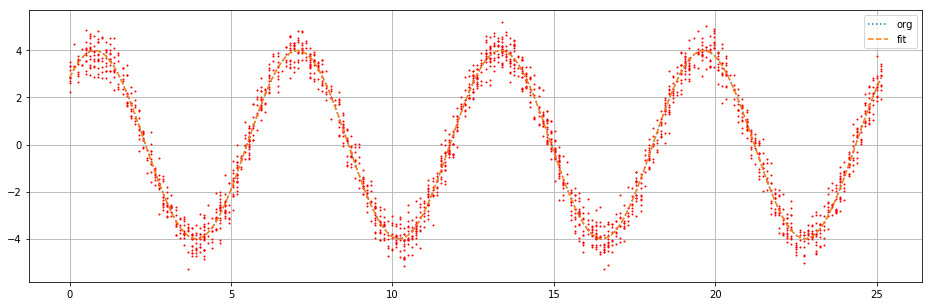

In [75]:
x = np.linspace(0, 8*np.pi, 200)
y = func(x, np.pi/4)

sample = np.random.randint(len(x), size=2000)
xs = x[sample]
ys = y[sample]
ys += np.random.normal(0, 0.5, len(ys))

minroot = opt.root(model, 0.8)
print (minroot.message)
print (minroot.success)
print (minroot.x)
yfit = func(x, minroot.x)

plt.figure(figsize=(16,5))
plt.plot(x, y, ':', label='org')
plt.plot(xs, ys, 'r.', ms=2)
plt.plot(x, yfit, '--', label='fit')

plt.grid();
plt.legend();

In [76]:
params, _ = opt.curve_fit(func, xs, ys)
print (params[0])

0.7817033995601943


In [77]:
print (np.sum((func(xs, minroot.x)-ys)**2))
print (np.sum((func(xs, params[0])-ys)**2))

494.0873627173553
494.0873627173553
